# Data exploration (task 1)

## Load data

In [1]:
# Start dask cluster
from dask.distributed import Client, LocalCluster
cluster = LocalCluster()
client = Client(cluster)
client

/home/kristian/.local/share/virtualenvs/fakenewsproject-e_-K5Da1/lib/python3.10/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 34915 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:34915/status,
Dashboard: http://127.0.0.1:34915/status,Workers: 4
Total threads: 8,Total memory: 15.55 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:35535,Workers: 4
Dashboard: http://127.0.0.1:34915/status,Total threads: 8
Started: Just now,Total memory: 15.55 GiB
Comm: tcp://127.0.0.1:38785,Total threads: 2
Dashboard: http://127.0.0.1:39335/status,Memory: 3.89 GiB
Nanny: tcp://127.0.0.1:44133,


In [2]:
# Connect to my servers S3 bucket
import dask.dataframe as dd
df = dd.read_parquet(
    "s3://fakenews/shuffled_deduped/shuffled_deduped.parquet",
    storage_options={
        'anon': False,
        'key': 'kristian',
        'secret': 'kristianersej',
        'client_kwargs': {
            'endpoint_url': 'http://172.25.133.208:9000'
        }
    }
)
df.head()

,id,type,content,title
0,4171095,fake,New Catholics remind us to take faith seriousl...,New Catholics remind us to take faith seriousl...
1,1140817,rumor,The Spaniard has endured a frustrating couple ...,Chelsea can't win the title without this playe...
2,2617658,political,"How Sony, Obama, Seth Rogen and the CIA Secret...","How Sony, Obama, Seth Rogen and the CIA Secret..."
3,7261250,junksci,by PAUL FASSA “If the doors of perception wer...,A 65 Year Old Woman with Cancer Trips Out on S...
4,8078086,reliable,Follow @ZeeNews His long-winded political ran...,"Fidel Castro: Revolutionary, renaissance man |..."


## Summary statistics

### Counts pr. type

In [8]:
type_value_counts = df.type.value_counts().compute()
type_value_counts

reliable      1808242
political      972306
bias           771419
fake           770341
conspiracy     495436
rumor          376815
unknown        231320
clickbait      176403
unreliable     104651
satire          85526
junksci         79435
hate            65265
Name: type, dtype: int64

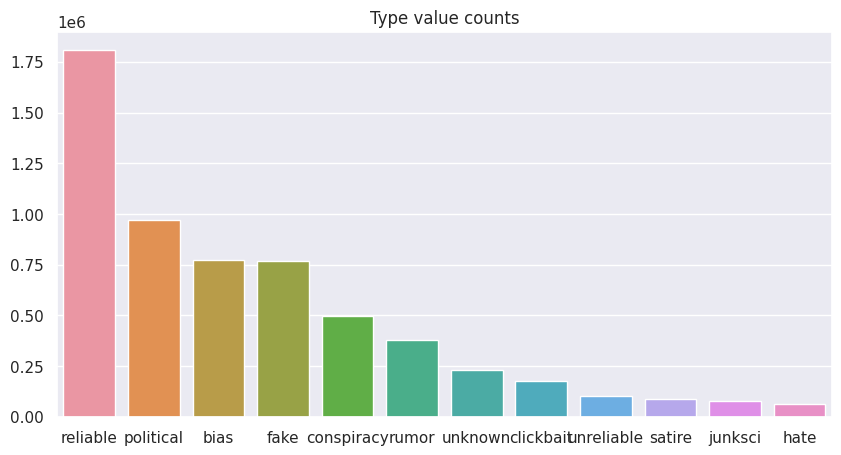

In [10]:
# Graph
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.figure(figsize=(10, 5))
sns.barplot(x=type_value_counts.index, y=type_value_counts.values)
plt.title('Type value counts')
plt.show()

## Nr. of domains and articles pr. domain

In [11]:
# Number of domains
number_of_domains = df.domain.nunique().compute()
number_of_domains

AttributeError: 'DataFrame' object has no attribute 'domain'